In [1]:
import glob
from IPython.display import Video

import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch

from torchvision.transforms import Compose, Lambda
from torchvision.transforms._transforms_video import (
    CenterCropVideo,
    NormalizeVideo,
)
from pytorchvideo.transforms import (
    ShortSideScale,
    UniformTemporalSubsample,
)

In [57]:
videos_avi = sorted(glob.glob('videos/avi/*.avi'))
print(videos)

['videos/npy/08.npy', 'videos/npy/20.npy', 'videos/npy/21.npy', 'videos/npy/09.npy', 'videos/npy/23.npy', 'videos/npy/22.npy', 'videos/npy/26.npy', 'videos/npy/25.npy', 'videos/npy/19.npy', 'videos/npy/18.npy', 'videos/npy/24.npy', 'videos/npy/01.npy', 'videos/npy/15.npy', 'videos/npy/14.npy', 'videos/npy/16.npy', 'videos/npy/02.npy', 'videos/npy/03.npy', 'videos/npy/17.npy', 'videos/npy/13.npy', 'videos/npy/07.npy', 'videos/npy/06.npy', 'videos/npy/12.npy', 'videos/npy/04.npy', 'videos/npy/10.npy', 'videos/npy/11.npy', 'videos/npy/05.npy']


In [37]:
def load_video_avi(path):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)
    finally:
        cap.release()

    return np.array(frames, dtype=np.uint8)

In [72]:
def transform_video(video, n_frames=64):
    transform = Compose([UniformTemporalSubsample(n_frames),
                         Lambda(lambda x: x / 1.0),
                         ShortSideScale(size=256),
                         CenterCropVideo(crop_size=(256, 256))])
    video = transform(video)
    return video

In [44]:
def save_as_np(video, video_name):
    np.save(f'videos/npy/{video_name[-6:-4]}.npy', video.numpy())

In [47]:
for video_path in videos_avi:
    video = load_video_avi(video_path)
    video = torch.from_numpy(video).permute(3, 0, 1, 2)
    video = transform_video(video)
    save_as_np(video, video_path)

In [5]:
def load_video_npy(path):
    video = np.load(path)
    return video

In [6]:
videos = glob.glob("videos/npy/*.npy")
print(videos)

['videos/npy/08.npy', 'videos/npy/20.npy', 'videos/npy/21.npy', 'videos/npy/09.npy', 'videos/npy/23.npy', 'videos/npy/22.npy', 'videos/npy/26.npy', 'videos/npy/25.npy', 'videos/npy/19.npy', 'videos/npy/18.npy', 'videos/npy/24.npy', 'videos/npy/01.npy', 'videos/npy/15.npy', 'videos/npy/14.npy', 'videos/npy/16.npy', 'videos/npy/02.npy', 'videos/npy/03.npy', 'videos/npy/17.npy', 'videos/npy/13.npy', 'videos/npy/07.npy', 'videos/npy/06.npy', 'videos/npy/12.npy', 'videos/npy/04.npy', 'videos/npy/10.npy', 'videos/npy/11.npy', 'videos/npy/05.npy']


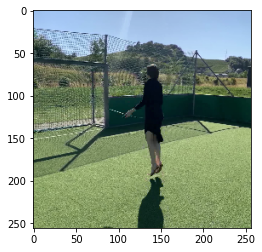

In [49]:
video = load_video_npy("videos/npy/25.npy")
#video_torch = torch.from_numpy(video).permute(3, 0, 1, 2)
#video_transform = transform_video(video_torch)
plt.imshow(1/255 * video[:, 9].transpose((1, 2, 0)));

In [ ]:
## video = load_video_avi(videos_avi[2])
video = torch.from_numpy(video).permute(3, 0, 1, 2)
video = transform_video(video).numpy()
plt.imshow(video[:, 0].transpose((1, 2, 0)));

torch.Size([3, 136, 1920, 1440])


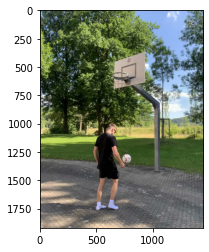

In [67]:
video = load_video_avi(videos_avi[2])
video = torch.from_numpy(video).permute(3, 0, 1, 2)
#video = transform_video(video).numpy()
print(video.shape)
plt.imshow(video[:, 0].numpy().transpose((1, 2, 0)))